In [2]:
import proteusAI as pai
import pandas as pd

In [3]:
# Load the library data pae
library_pae = pai.Library(source='demo/demo_data/master_dataset.csv', seqs_col='binder_seq', y_col='pae_interaction_HLA-A101-RVTDESILSY', 
                    y_type='num', names_col='binder_name')
# Load the library data plddt
library_plddt = pai.Library(source='demo/demo_data/master_dataset.csv', seqs_col='binder_seq', y_col='plddt_binder_HLA-A101-RVTDESILSY', 
                    y_type='num', names_col='binder_name')

In [4]:
# Load the model for pae and plddt
model_pae = pai.Model(library=library_pae)
plddt_model = pai.Model(library=library_plddt)

In [5]:
# Train the model for pae
_ = model_pae.train(k_folds=5, model_type='rf', x='blosum62', seed=42, split=(60,20,20))

Training completed:
val_r2:	-0.652321883984819


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Predicted vs. True y-values'}, xlabel='y', ylabel='predicted y'>)

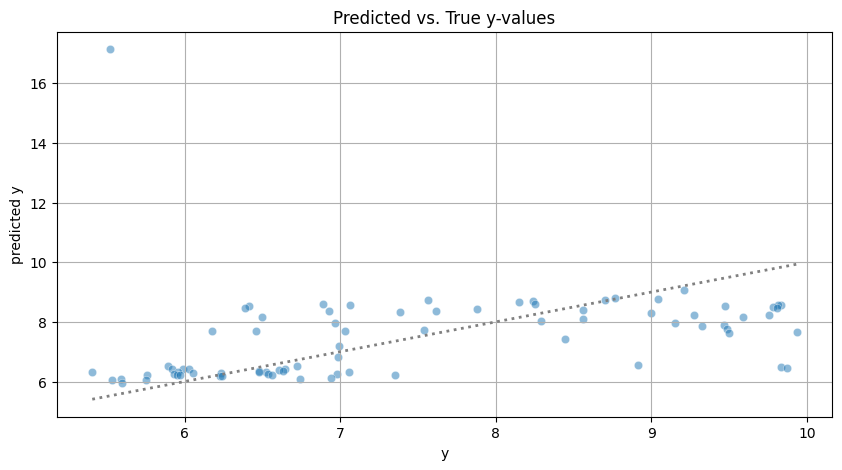

In [6]:
# 
model_pae.true_vs_predicted(y_true=model_pae.y_val, y_pred=model_pae.y_val_pred)

In [7]:
train_names = [prot.name for prot in model_pae.train_data]
test_names = [prot.name for prot in model_pae.test_data]
val_names = [prot.name for prot in model_pae.val_data]

In [8]:
train = [prot for prot in plddt_model.library.proteins if prot.name in train_names]
test = [prot for prot in plddt_model.library.proteins if prot.name in test_names]
val = [prot for prot in plddt_model.library.proteins if prot.name in val_names]

split = {'train':train, 'test':test, 'val':val}

# Train the model for plddt
plddt_train = plddt_model.train(k_folds=5, model_type='rf', x='blosum62', seed=42, split=split)

Training completed:
val_r2:	0.301298566241576


(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'Predicted vs. True y-values'}, xlabel='y', ylabel='predicted y'>)

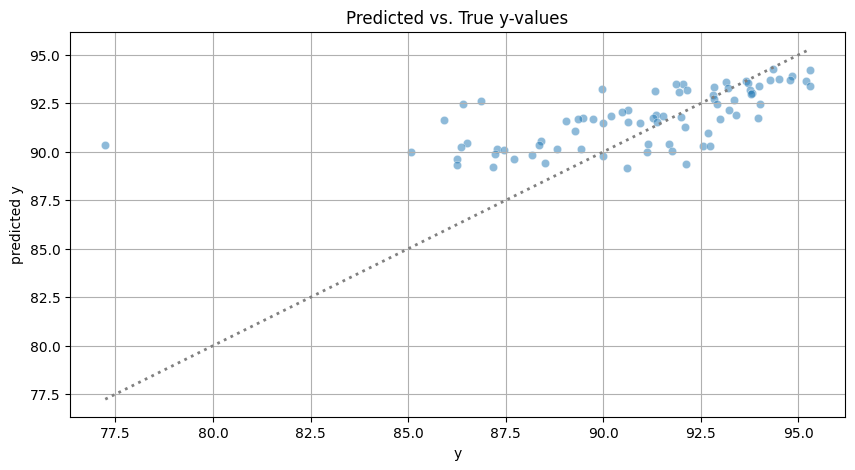

In [9]:
plddt_model.true_vs_predicted(y_true=plddt_model.y_val, y_pred=plddt_model.y_val_pred)

In [10]:
pae_out = model_pae.search(optim_problem='min', overwrite=True) # acq_fn = 'ei'

TypeError: search() got an unexpected keyword argument 'overwrite'

In [11]:
predicted_proteins = [pai.Protein(seq=row.sequence, name=row['name']) for i, row in pae_out.iterrows()]
plddt_predictions = plddt_model.predict(predicted_proteins)

In [12]:
for prot in plddt_predictions[0]:
    print(prot)
    predicted_plddt_value = prot.y_pred
    predicted_plddt_sigma = prot.y_sigma
    print(predicted_plddt_value, predicted_plddt_sigma)
    break

proteusAI.Protein():
____________________
name	: binder_1+E73S
seq	: EEEEKFKKELEETRKRMLEEARELTARAVEALRAGEELLAQALSNAAGILMTVVSLADNLLLGDLKGAEINLSSMEKLYEILKETAEQLKAKHPEYAPEVEELLKLAEEALKEAKKLLEKAKKL
rep	: []
y:	None
y_pred:	95.02595400000001
y_sig:	0.7905564267679063
struc:	None

95.02595400000001 0.7905564267679063


In [18]:
out_pae = pae_out.sort_values(by=['y_predicted'], ascending=True)
out_pae.to_csv('demo/demo_data/predictions_pae.csv')

array([[<Axes: title={'center': 'y_predicted'}>,
        <Axes: title={'center': 'y_sigma'}>],
       [<Axes: title={'center': 'acq_score'}>, <Axes: >]], dtype=object)

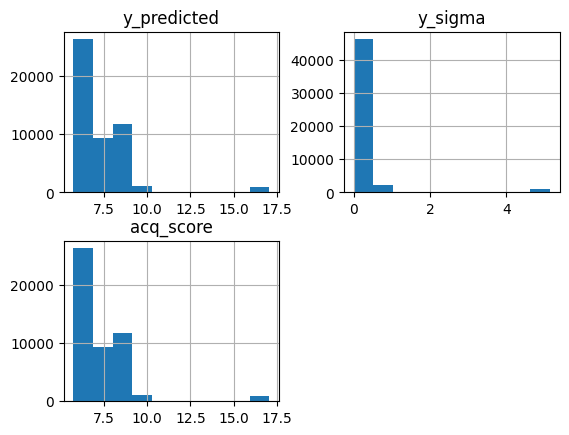

In [19]:
out_pae.hist()